In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'1.15.0-dev20190709'

In [7]:
import numpy as np
from tensorflow import keras 
from tensorflow.python.keras.datasets import fashion_mnist #this is our dataset

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
tf.enable_eager_execution()

In [10]:
batch_size = 128
epochs = 20
n_classes = 10
learning_rate = 0.1
width = 28 # of our images
height = 28 # of our images

In [4]:
fashion_labels =["Shirt/top","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boots"]

In [11]:
(x_train, y_train), (x_test, y_test) =fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train,x_test=x_train.astype(np.float32)/255.,x_test.astype(np.float32)/255.

In [14]:
x_train,x_test=x_train.reshape([-1,784]),x_test.reshape([-1,784])

In [15]:
split = 50000
#split training sets into training and validation sets
(x_train, x_valid) = x_train[:split], x_train[split:]
(y_train, y_valid) = y_train[:split], y_train[split:]

In [17]:
y_train_ohe=tf.one_hot(y_train,depth=n_classes).numpy()
y_valid_ohe=tf.one_hot(y_valid,depth=n_classes).numpy()
y_test_ohe=tf.one_hot(y_test,depth=n_classes).numpy()

In [18]:
i=5
print(y_train[i]) # 'ordinairy' number value of label at index i
print (tf.one_hot(y_train[i], depth=n_classes))# same value as a 1. in correct position in an length 10 1D tensor
print(y_train_ohe[i]) # same value as a 1. in correct position in an length 10 1D numpy a

2
tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Ankle boots===Shirt/top===Shirt/top===Dress===Shirt/top===Pullover===Sneaker===Pullover===Sandal===Sandal===

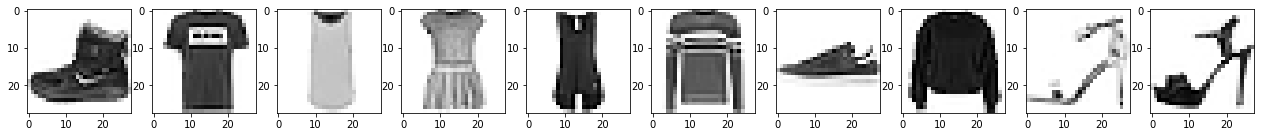

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
_,image = plt.subplots(1,10,figsize=(22,22))
for i in range(10):
    image[i].imshow(np.reshape(x_train[i],(width, height)), cmap="Greys")
    print(fashion_labels[y_train[i]],sep='', end='===')

In [25]:
class LogisticRegression(tf.keras.Model):
    def __init__(self, num_classes):
        super(LogisticRegression,self).__init__()
        self.dense=tf.keras.layers.Dense(num_classes)
    def call(self,inputs):
        output=self.dense(inputs)
        with tf.device('/cpu:0'):
            output=tf.nn.softmax(output)
        return output
        

In [26]:
model=LogisticRegression(num_classes=n_classes)


In [40]:
optimiser=tf.keras.optimizers.Adam(learning_rate)
model.compile(optimiser,loss='categorical_crossentropy',metrics=['accuracy'])


In [41]:
dummy=tf.zeros(shape=(1,784))

In [42]:
model.call(dummy)

<tf.Tensor: id=91760, shape=(1, 10), dtype=float32, numpy=
array([[0.09998878, 0.09999578, 0.09996588, 0.09999991, 0.10000902,
        0.09998983, 0.10002515, 0.09999855, 0.10001905, 0.10000809]],
      dtype=float32)>

### Path should be specified format only

In [53]:
checkpointer = ModelCheckpoint(filepath="./model.weights.best.hdf5", verbose=2,save_best_only=True)

In [57]:
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_valid,y_valid_ohe),verbose=True, callbacks=[checkpointer])

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
47872/50000 [===========================>..] - ETA: 0s - loss: 403.6949 - acc: 0.0018
Epoch 00001: val_loss did not improve from 6.83092
50000/50000 [==============================] - 1s 16us/sample - loss: 405.0108 - acc: 0.0018 - val_loss: 8.5363 - val_acc: 0.1850
Epoch 2/20
47104/50000 [===========================>..] - ETA: 0s - loss: 383.0771 - acc: 0.0239 
Epoch 00002: val_loss did not improve from 6.83092
50000/50000 [==============================] - 1s 16us/sample - loss: 380.9611 - acc: 0.0318 - val_loss: 7.6728 - val_acc: 0.0769
Epoch 3/20
47616/50000 [===========================>..] - ETA: 0s - loss: 354.7930 - acc: 0.1483
Epoch 00003: val_loss did not improve from 6.83092
50000/50000 [==============================] - 1s 17us/sample - loss: 353.5833 - acc: 0.1508 - val_loss: 7.7481 - val_acc: 0.1009
Epoch 4/20
48000/50000 [===========================>..] - ETA: 0s - loss: 348.9355 - acc: 0.1380
Epoch 00004: val_l

In [58]:
model.load_weights("./model.weights.best.hdf5")

In [59]:
model.evaluate(x=x_test,y=y_test_ohe)

10000/10000 [==============================] - 0s 22us/sample - loss: 6.8028 - acc: 0.1254


[6.802787699890136, 0.1254]

### KNN on IRIS datset

In [68]:
from sklearn import datasets

In [78]:
import numpy as np

In [93]:
iris = datasets.load_iris()
x = iris.data
y = np.array(iris.target)
x.shape, y.shape

((150, 4), (150,))

In [94]:
flower_labels = ["iris setosa", "iris virginica", "iris versicolor"]

In [95]:
y=np.eye(len(set(y)))[y]

In [96]:
x=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))

In [98]:
np.random.seed(42)
split = 0.8 # this makes 120 train and 30 test features

In [101]:
train_indices=np.random.choice(len(x), round(len(x) * split), replace=False)

In [106]:
test_indices=np.array(list(set(range(len(x)))-set(train_indices)))

In [107]:
train_x = x[train_indices]
test_x = x[test_indices]
train_y = y[train_indices]
test_y = y[test_indices]

In [109]:
test_x.shape

(30, 4)

In [ ]:
def distance(train_x,test_x,

In [140]:
distance=tf.reduce_sum(tf.abs(tf.subtract(tf.expand_dims(test_x,axis=1),train_x)),axis=2)

In [141]:
distance

<tf.Tensor: id=324920, shape=(30, 120), dtype=float64, numpy=
array([[0.52283427, 0.81897363, 0.8747646 , ..., 0.61393597, 1.99270245,
        2.07603578],
       [0.14030132, 0.32532957, 1.36840866, ..., 0.20362524, 1.66572505,
        1.74905838],
       [0.40560264, 0.39618644, 1.46421846, ..., 0.413371  , 1.73658192,
        1.81991525],
       ...,
       [1.13983051, 1.43596987, 0.57556497, ..., 1.06426554, 2.77636535,
        2.85969868],
       [0.27306968, 0.45809793, 1.31897363, ..., 0.0863936 , 1.79849341,
        1.88182674],
       [0.3702919 , 0.44420904, 1.24952919, ..., 0.12806026, 1.61793785,
        1.70127119]])>

In [145]:
_,__=tf.nn.top_k(tf.negative(distance), k=2)

In [146]:
__

<tf.Tensor: id=324932, shape=(30, 2), dtype=int32, numpy=
array([[ 98,  87],
       [  0,  42],
       [ 44,  42],
       [ 19,  70],
       [ 85,  40],
       [ 11,  22],
       [ 13,  32],
       [109,   6],
       [104,  42],
       [  9,  95],
       [ 61,  62],
       [ 33,  32],
       [ 46,  12],
       [114,  19],
       [ 60,   9],
       [ 30,   3],
       [ 50,  83],
       [ 36,  60],
       [ 30, 119],
       [102,  94],
       [ 77,  88],
       [113,  21],
       [ 35,  37],
       [ 66,  84],
       [104,  86],
       [ 78,  28],
       [ 58, 103],
       [ 16,  85],
       [117, 104],
       [ 46, 117]], dtype=int32)>

In [169]:
np.stack(arrays, axis=2).shape

(3, 4, 2)

In [170]:
np.stack(arrays, axis=-1)

array([[[ 0.2334658 ,  1.90590724],
        [ 0.80265226,  0.22760232],
        [ 0.05407087, -0.19467026],
        [ 0.24035116,  1.41967298]],

       [[ 0.82335252,  0.46073707],
        [ 2.05245274,  0.5861056 ],
        [ 0.25119497, -1.52316087],
        [-0.45379666,  1.20591521]],

       [[-2.02923086,  0.37558807],
        [ 1.96130347, -1.37158938],
        [-0.26324171,  0.48509411],
        [ 0.53480929, -2.06252567]]])